Silakan upload gambar (warna atau grayscale) Anda:


Saving rumah.jpg to rumah.jpg
Gambar yang diupload: rumah.jpg


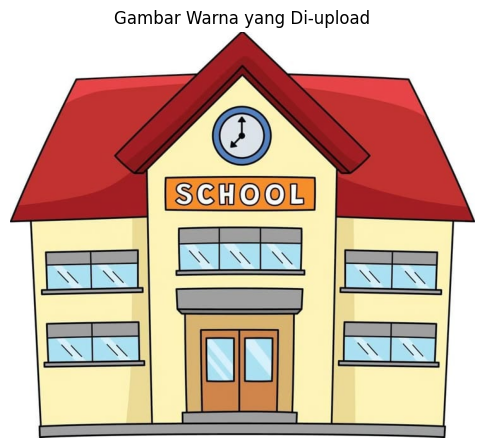

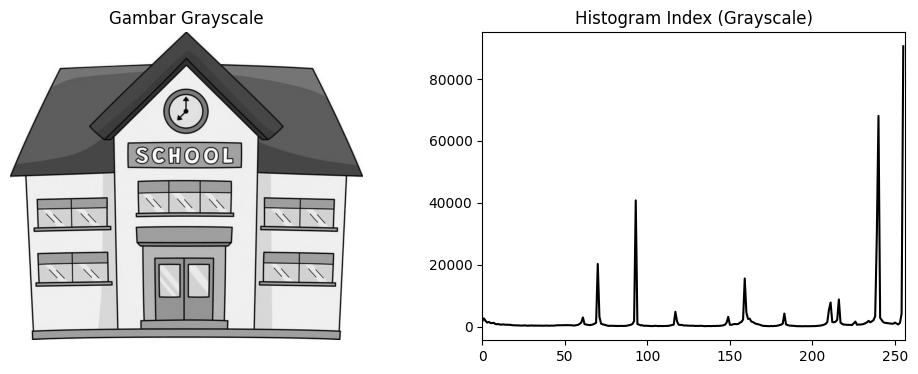

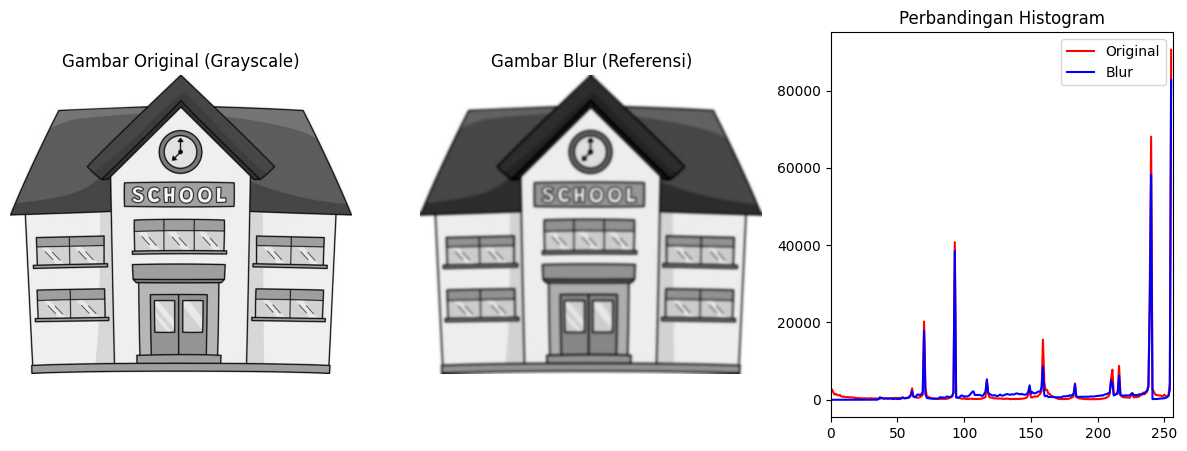

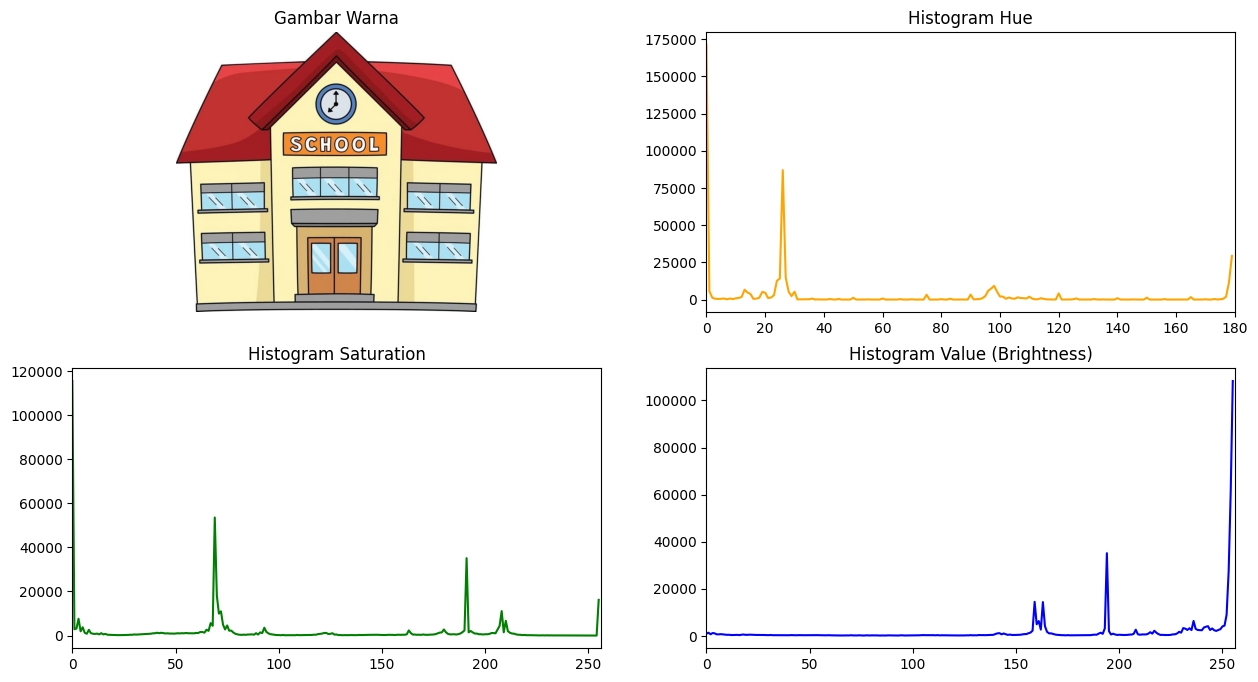

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload file gambar dari komputer user
print("Silakan upload gambar (warna atau grayscale) Anda:")
uploaded = files.upload()

filename = next(iter(uploaded))
print(f"Gambar yang diupload: {filename}")

# Baca gambar dengan OpenCV (warna)
image_color = cv2.imread(filename)
if image_color is None:
    raise Exception("Gambar gagal dibaca. Pastikan file gambar valid.")

# Tampilkan gambar asli
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Gambar Warna yang Di-upload")
plt.axis('off')
plt.show()

# 1. Histogram Indeks (Grayscale)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
hist_gray = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist_gray, color='black')
plt.title('Histogram Index (Grayscale)')
plt.xlim([0, 256])
plt.show()

# 2. Histogram Referensi (Perbandingan histogram gambar asli dan gambar blur)
image_blur = cv2.GaussianBlur(image_gray, (15, 15), 0)
hist_blur = cv2.calcHist([image_blur], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Gambar Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_blur, cmap='gray')
plt.title('Gambar Blur (Referensi)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(hist_gray, color='red', label='Original')
plt.plot(hist_blur, color='blue', label='Blur')
plt.title('Perbandingan Histogram')
plt.xlim([0, 256])
plt.legend()
plt.show()

# 3. Histogram HSV (channel Hue, Saturation, Value)
hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)
h_hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
s_hist = cv2.calcHist([hsv], [1], None, [256], [0, 256])
v_hist = cv2.calcHist([hsv], [2], None, [256], [0, 256])

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Warna')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(h_hist, color='orange')
plt.title('Histogram Hue')
plt.xlim([0, 180])

plt.subplot(2, 2, 3)
plt.plot(s_hist, color='green')
plt.title('Histogram Saturation')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.plot(v_hist, color='blue')
plt.title('Histogram Value (Brightness)')
plt.xlim([0, 256])

plt.show()

Upload gambar tomat (jpg/png):


Saving tomat merah.jpg to tomat merah.jpg
Gambar 'tomat merah.jpg' berhasil diupload.


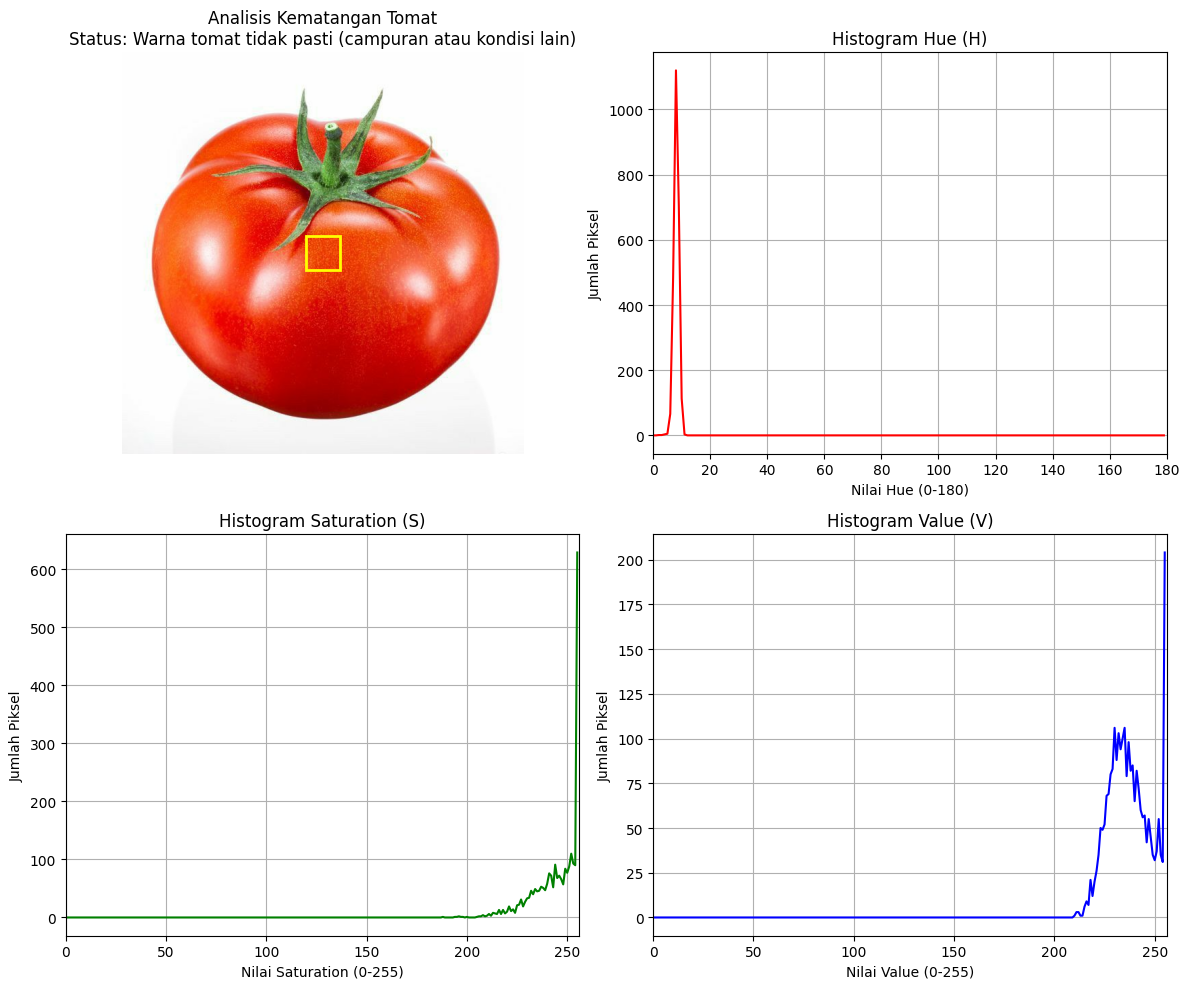


--- Hasil Analisis ---
Nama File: tomat merah.jpg
Rata-rata warna area tengah (RGB): (237, 72, 10)
Rata-rata warna area tengah (HSV): (Hue=16.2°, Saturation=0.96, Value=0.93)
Hasil deteksi: Warna tomat tidak pasti (campuran atau kondisi lain)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def upload_image():
    """Mengunggah gambar dari lokal ke Google Colab."""
    print("Upload gambar tomat (jpg/png):")
    uploaded = files.upload()
    filename = next(iter(uploaded))
    img = cv2.imread(filename)
    if img is None:
        raise ValueError("Gambar tidak terbaca. Pastikan file gambar valid.")
    print(f"Gambar '{filename}' berhasil diupload.")
    return img, filename

def detect_tomato_ripeness(h_avg, s_avg, v_avg):
    """Mendeteksi kematangan berdasarkan nilai HSV rata-rata."""
    # Rentang HSV untuk tomat matang (merah)
    # H: 0-15 (merah) atau 345-360 (merah). Di OpenCV, H adalah 0-180.
    # Jadi rentangnya adalah 0-7.5 atau 172.5-180.
    # S: >= 0.5 (nilai 0-1, tapi di OpenCV 0-255) -> >= 128
    # V: >= 0.4 (nilai 0-1, tapi di OpenCV 0-255) -> >= 102
    # Kita akan menggunakan rentang HSV OpenCV (H: 0-180, S: 0-255, V: 0-255)
    h_opencv = h_avg / 2 # Konversi H dari 0-360 ke 0-180
    s_opencv = s_avg * 255
    v_opencv = v_avg * 255

    # Sesuaikan rentang dengan HSV OpenCV (H: 0-180)
    # Merah: H sekitar 0-7.5 atau 172.5-180
    # Hijau/Kuning: H sekitar 35/2 - 85/2 = 17.5 - 42.5

    ripe = ((h_opencv >= 0 and h_opencv <= 7.5) or (h_opencv >= 172.5 and h_opencv <= 180)) and s_opencv >= 128 and v_opencv >= 102
    unripe = (h_opencv >= 17.5 and h_opencv <= 42.5) and s_opencv >= (0.3 * 255) and v_opencv >= (0.3 * 255)


    if ripe:
        return "Tomat MATANG (merah terang)"
    elif unripe:
        return "Tomat BELUM MATANG (hijau/kuning)"
    else:
        return "Warna tomat tidak pasti (campuran atau kondisi lain)"

def main():
    """Fungsi utama untuk analisis gambar tomat."""
    try:
        img_bgr, fname = upload_image()
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV) # Konversi ke HSV OpenCV

        h_img, w_img, _ = img_rgb.shape
        center_x, center_y = w_img // 2, h_img // 2
        box_size = 50 # Ukuran kotak analisis
        x1 = max(center_x - box_size//2, 0)
        y1 = max(center_y - box_size//2, 0)
        x2 = min(center_x + box_size//2, w_img)
        y2 = min(center_y + box_size//2, h_img)

        # Ambil area tengah dari gambar RGB (untuk tampilan) dan HSV (untuk analisis)
        center_area_rgb = img_rgb[y1:y2, x1:x2]
        center_area_hsv = img_hsv[y1:y2, x1:x2]

        # Hitung rata-rata HSV dari area tengah untuk deteksi kematangan utama
        avg_color_hsv = center_area_hsv.mean(axis=(0,1))
        h_avg_cv, s_avg_cv, v_avg_cv = avg_color_hsv # Rata-rata dalam rentang OpenCV

        # Konversi rata-rata HSV OpenCV ke rentang 0-360 (H) dan 0-1 (S, V) untuk fungsi deteksi
        h_avg_norm = h_avg_cv * 2 # H dari 0-180 ke 0-360
        s_avg_norm = s_avg_cv / 255.0 # S dari 0-255 ke 0-1
        v_avg_norm = v_avg_cv / 255.0 # V dari 0-255 ke 0-1

        # Deteksi kematangan menggunakan nilai HSV rata-rata (dalam rentang 0-360 H, 0-1 S/V)
        status = detect_tomato_ripeness(h_avg_norm, s_avg_norm, v_avg_norm)

        # --- Tampilkan Hasil ---
        # Mengatur figure dengan 2 baris dan 2 kolom untuk 4 subplot
        plt.figure(figsize=(12, 10)) # Ukuran figure

        # Plot 1: Gambar Asli dengan Kotak Analisis (baris 1, kolom 1)
        plt.subplot(2, 2, 1)
        plt.imshow(img_rgb)
        plt.title(f"Analisis Kematangan Tomat\nStatus: {status}", fontsize=12)
        # Gambar kotak analisis
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='yellow', facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)
        plt.axis('off')

        # Plot 2: Histogram Hue (H) (baris 1, kolom 2)
        plt.subplot(2, 2, 2)
        hist_h = cv2.calcHist([center_area_hsv], [0], None, [180], [0, 180]) # Channel 0 = Hue
        plt.plot(hist_h, color='r') # Biasanya Hue digambarkan dengan warna merah
        plt.xlim([0, 180])
        plt.title("Histogram Hue (H)")
        plt.xlabel("Nilai Hue (0-180)")
        plt.ylabel("Jumlah Piksel")
        plt.grid(True)

        # Plot 3: Histogram Saturation (S) (baris 2, kolom 1)
        plt.subplot(2, 2, 3)
        hist_s = cv2.calcHist([center_area_hsv], [1], None, [256], [0, 256]) # Channel 1 = Saturation
        plt.plot(hist_s, color='g') # Biasanya Saturation digambarkan dengan warna hijau
        plt.xlim([0, 256])
        plt.title("Histogram Saturation (S)")
        plt.xlabel("Nilai Saturation (0-255)")
        plt.ylabel("Jumlah Piksel")
        plt.grid(True)

        # Plot 4: Histogram Value (V) (baris 2, kolom 2)
        plt.subplot(2, 2, 4)
        hist_v = cv2.calcHist([center_area_hsv], [2], None, [256], [0, 256]) # Channel 2 = Value
        plt.plot(hist_v, color='b') # Biasanya Value digambarkan dengan warna biru
        plt.xlim([0, 256])
        plt.title("Histogram Value (V)")
        plt.xlabel("Nilai Value (0-255)")
        plt.ylabel("Jumlah Piksel")
        plt.grid(True)

        plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
        plt.show()

        # Hitung rata-rata RGB juga jika ingin menampilkannya
        avg_color_rgb = center_area_rgb.mean(axis=(0,1))
        r_avg, g_avg, b_avg = avg_color_rgb

        print(f"\n--- Hasil Analisis ---")
        print(f"Nama File: {fname}")
        print(f"Rata-rata warna area tengah (RGB): ({r_avg:.0f}, {g_avg:.0f}, {b_avg:.0f})")
        # Menampilkan rata-rata HSV dalam rentang 0-360 (H) dan 0-1 (S, V)
        print(f"Rata-rata warna area tengah (HSV): (Hue={h_avg_norm:.1f}°, Saturation={s_avg_norm:.2f}, Value={v_avg_norm:.2f})")
        print(f"Hasil deteksi: {status}")

    except ValueError as ve:
        print(f"Error: {ve}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")


if __name__ == "__main__":
    main()

Upload gambar tomat (jpg/png):


Saving tomat kuning.jpg to tomat kuning.jpg
Gambar 'tomat kuning.jpg' berhasil diupload.


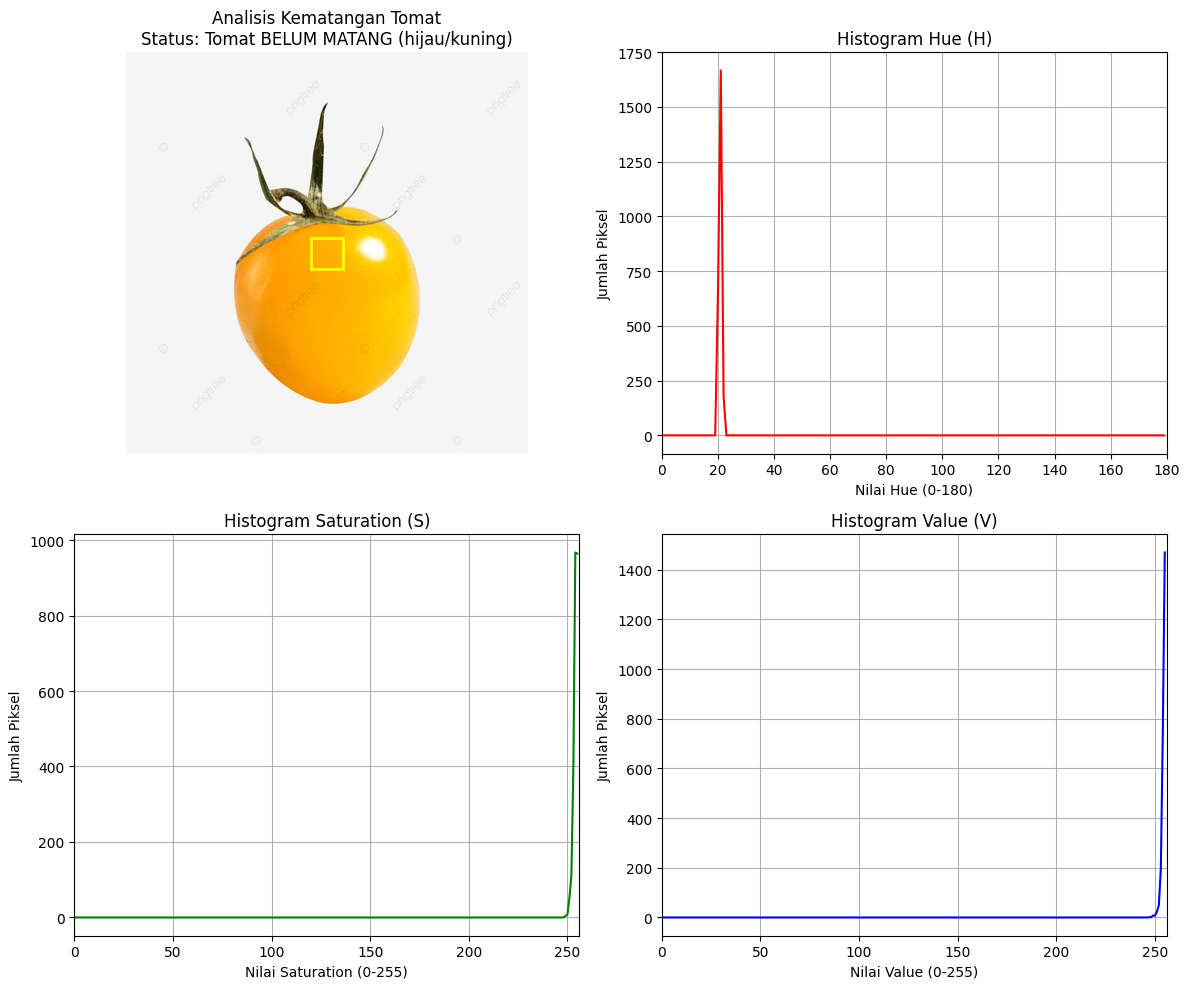


--- Hasil Analisis ---
Nama File: tomat kuning.jpg
Rata-rata warna area tengah (RGB): (254, 176, 1)
Rata-rata warna area tengah (HSV): (Hue=41.6°, Saturation=1.00, Value=1.00)
Hasil deteksi: Tomat BELUM MATANG (hijau/kuning)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def upload_image():
    """Mengunggah gambar dari lokal ke Google Colab."""
    print("Upload gambar tomat (jpg/png):")
    uploaded = files.upload()
    filename = next(iter(uploaded))
    img = cv2.imread(filename)
    if img is None:
        raise ValueError("Gambar tidak terbaca. Pastikan file gambar valid.")
    print(f"Gambar '{filename}' berhasil diupload.")
    return img, filename

def detect_tomato_ripeness(h_avg, s_avg, v_avg):
    """Mendeteksi kematangan berdasarkan nilai HSV rata-rata."""
    # Rentang HSV untuk tomat matang (merah)
    # H: 0-15 (merah) atau 345-360 (merah). Di OpenCV, H adalah 0-180.
    # Jadi rentangnya adalah 0-7.5 atau 172.5-180.
    # S: >= 0.5 (nilai 0-1, tapi di OpenCV 0-255) -> >= 128
    # V: >= 0.4 (nilai 0-1, tapi di OpenCV 0-255) -> >= 102
    # Kita akan menggunakan rentang HSV OpenCV (H: 0-180, S: 0-255, V: 0-255)
    h_opencv = h_avg / 2 # Konversi H dari 0-360 ke 0-180
    s_opencv = s_avg * 255
    v_opencv = v_avg * 255

    # Sesuaikan rentang dengan HSV OpenCV (H: 0-180)
    # Merah: H sekitar 0-7.5 atau 172.5-180
    # Hijau/Kuning: H sekitar 35/2 - 85/2 = 17.5 - 42.5

    ripe = ((h_opencv >= 0 and h_opencv <= 7.5) or (h_opencv >= 172.5 and h_opencv <= 180)) and s_opencv >= 128 and v_opencv >= 102
    unripe = (h_opencv >= 17.5 and h_opencv <= 42.5) and s_opencv >= (0.3 * 255) and v_opencv >= (0.3 * 255)


    if ripe:
        return "Tomat MATANG (merah terang)"
    elif unripe:
        return "Tomat BELUM MATANG (hijau/kuning)"
    else:
        return "Warna tomat tidak pasti (campuran atau kondisi lain)"

def main():
    """Fungsi utama untuk analisis gambar tomat."""
    try:
        img_bgr, fname = upload_image()
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV) # Konversi ke HSV OpenCV

        h_img, w_img, _ = img_rgb.shape
        center_x, center_y = w_img // 2, h_img // 2
        box_size = 50 # Ukuran kotak analisis
        x1 = max(center_x - box_size//2, 0)
        y1 = max(center_y - box_size//2, 0)
        x2 = min(center_x + box_size//2, w_img)
        y2 = min(center_y + box_size//2, h_img)

        # Ambil area tengah dari gambar RGB (untuk tampilan) dan HSV (untuk analisis)
        center_area_rgb = img_rgb[y1:y2, x1:x2]
        center_area_hsv = img_hsv[y1:y2, x1:x2]

        # Hitung rata-rata HSV dari area tengah untuk deteksi kematangan utama
        avg_color_hsv = center_area_hsv.mean(axis=(0,1))
        h_avg_cv, s_avg_cv, v_avg_cv = avg_color_hsv # Rata-rata dalam rentang OpenCV

        # Konversi rata-rata HSV OpenCV ke rentang 0-360 (H) dan 0-1 (S, V) untuk fungsi deteksi
        h_avg_norm = h_avg_cv * 2 # H dari 0-180 ke 0-360
        s_avg_norm = s_avg_cv / 255.0 # S dari 0-255 ke 0-1
        v_avg_norm = v_avg_cv / 255.0 # V dari 0-255 ke 0-1

        # Deteksi kematangan menggunakan nilai HSV rata-rata (dalam rentang 0-360 H, 0-1 S/V)
        status = detect_tomato_ripeness(h_avg_norm, s_avg_norm, v_avg_norm)

        # --- Tampilkan Hasil ---
        # Mengatur figure dengan 2 baris dan 2 kolom untuk 4 subplot
        plt.figure(figsize=(12, 10)) # Ukuran figure

        # Plot 1: Gambar Asli dengan Kotak Analisis (baris 1, kolom 1)
        plt.subplot(2, 2, 1)
        plt.imshow(img_rgb)
        plt.title(f"Analisis Kematangan Tomat\nStatus: {status}", fontsize=12)
        # Gambar kotak analisis
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='yellow', facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)
        plt.axis('off')

        # Plot 2: Histogram Hue (H) (baris 1, kolom 2)
        plt.subplot(2, 2, 2)
        hist_h = cv2.calcHist([center_area_hsv], [0], None, [180], [0, 180]) # Channel 0 = Hue
        plt.plot(hist_h, color='r') # Biasanya Hue digambarkan dengan warna merah
        plt.xlim([0, 180])
        plt.title("Histogram Hue (H)")
        plt.xlabel("Nilai Hue (0-180)")
        plt.ylabel("Jumlah Piksel")
        plt.grid(True)

        # Plot 3: Histogram Saturation (S) (baris 2, kolom 1)
        plt.subplot(2, 2, 3)
        hist_s = cv2.calcHist([center_area_hsv], [1], None, [256], [0, 256]) # Channel 1 = Saturation
        plt.plot(hist_s, color='g') # Biasanya Saturation digambarkan dengan warna hijau
        plt.xlim([0, 256])
        plt.title("Histogram Saturation (S)")
        plt.xlabel("Nilai Saturation (0-255)")
        plt.ylabel("Jumlah Piksel")
        plt.grid(True)

        # Plot 4: Histogram Value (V) (baris 2, kolom 2)
        plt.subplot(2, 2, 4)
        hist_v = cv2.calcHist([center_area_hsv], [2], None, [256], [0, 256]) # Channel 2 = Value
        plt.plot(hist_v, color='b') # Biasanya Value digambarkan dengan warna biru
        plt.xlim([0, 256])
        plt.title("Histogram Value (V)")
        plt.xlabel("Nilai Value (0-255)")
        plt.ylabel("Jumlah Piksel")
        plt.grid(True)

        plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
        plt.show()

        # Hitung rata-rata RGB juga jika ingin menampilkannya
        avg_color_rgb = center_area_rgb.mean(axis=(0,1))
        r_avg, g_avg, b_avg = avg_color_rgb

        print(f"\n--- Hasil Analisis ---")
        print(f"Nama File: {fname}")
        print(f"Rata-rata warna area tengah (RGB): ({r_avg:.0f}, {g_avg:.0f}, {b_avg:.0f})")
        # Menampilkan rata-rata HSV dalam rentang 0-360 (H) dan 0-1 (S, V)
        print(f"Rata-rata warna area tengah (HSV): (Hue={h_avg_norm:.1f}°, Saturation={s_avg_norm:.2f}, Value={v_avg_norm:.2f})")
        print(f"Hasil deteksi: {status}")

    except ValueError as ve:
        print(f"Error: {ve}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")


if __name__ == "__main__":
    main()

Upload an image (jpg/png):


Saving persegi panjang.jpg to persegi panjang.jpg
Image 'persegi panjang.jpg' uploaded successfully.
Detected shapes in the image:
  1. Persegi Panjang


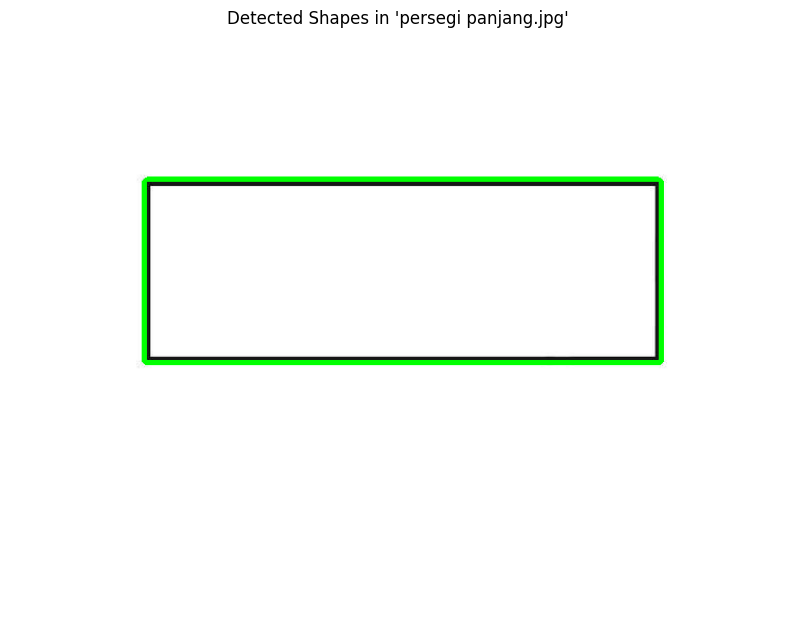

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def upload_image():
    """Upload an image from local to Google Colab."""
    print("Upload an image (jpg/png):")
    uploaded = files.upload()
    filename = next(iter(uploaded))
    img = cv2.imread(filename)
    if img is None:
        raise ValueError("Image could not be read. Please ensure the file is valid.")
    print(f"Image '{filename}' uploaded successfully.")
    return img, filename

def detect_shape(contour):
    """Detect shape based on contour."""
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
    vertices = len(approx)

    if vertices == 3:
        return "Segitiga"
    elif vertices == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Persegi" if 0.95 <= ar <= 1.05 else "Persegi Panjang"
    elif vertices == 5:
        return "Pentagon"
    else:
        area = cv2.contourArea(contour)
        if peri == 0:
            return "Bentuk tidak diketahui"
        circularity = 4 * np.pi * area / (peri * peri)
        return "Lingkaran" if circularity > 0.8 else "Bentuk lain"

def main():
    try:
        img, fname = upload_image()
        # Save uploaded image for processing
        cv2.imwrite(fname, img)

        # Process image for shape detection
        image = cv2.imread(fname)
        output = image.copy()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5,5), 0)
        _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        detected_shapes = []

        for contour in contours:
            area = cv2.contourArea(contour)
            if area < 500:
                continue
            shape_name = detect_shape(contour)
            detected_shapes.append(shape_name)

            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            cv2.drawContours(output, [contour], -1, (0, 255, 0), 3)
            cv2.putText(output, shape_name, (cX - 40, cY), cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, (255, 255, 255), 2)

        # Display results
        if detected_shapes:
            print("Detected shapes in the image:")
            for idx, s in enumerate(detected_shapes, 1):
                print(f"  {idx}. {s}")
        else:
            print("No valid shapes found in the image.")

        # Show annotated image
        plt.figure(figsize=(10,8))
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Shapes in '{fname}'")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

Upload an image (jpg/png):


Saving hitam.jpg to hitam (4).jpg
Image 'hitam (4).jpg' uploaded successfully.
Detected shapes in the image:
  1. Persegi Panjang
Fitur Tekstur:
Kontras: 53.1846
Dissimilarity: 0.4484
Hemogeneity: 0.9871
Energi: 0.7003
Korelasi: 0.9983
ASM: 0.4905
Warna Dominan (RGB): [152 152 152]


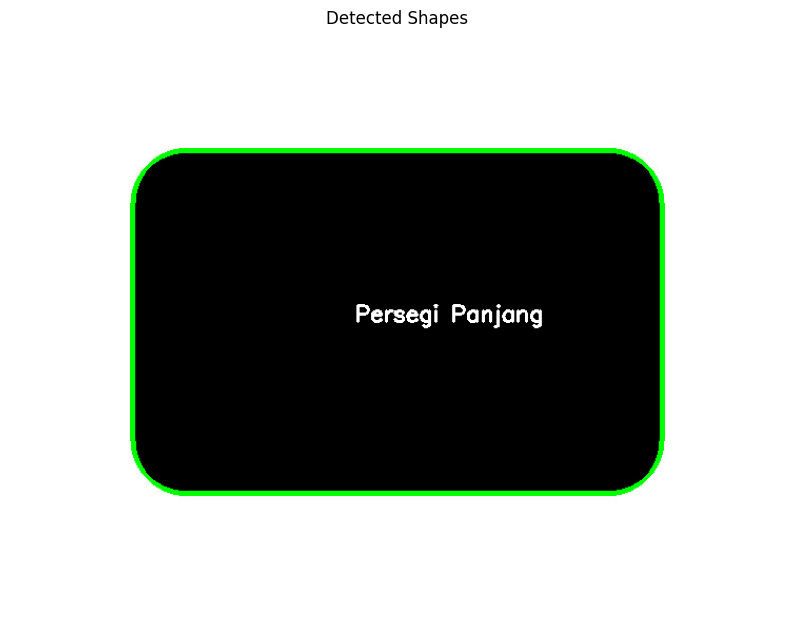

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage.feature import local_binary_pattern

def upload_image():
    """Upload an image from local to Google Colab."""
    print("Upload an image (jpg/png):")
    uploaded = files.upload()
    filename = next(iter(uploaded))
    img = cv2.imread(filename)
    if img is None:
        raise ValueError("Image could not be read. Please ensure the file is valid.")
    print(f"Image '{filename}' uploaded successfully.")
    return img, filename

def detect_shape(contour):
    """Detect shape based on contour."""
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
    vertices = len(approx)

    if vertices == 3:
        return "Segitiga"
    elif vertices == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Persegi" if 0.95 <= ar <= 1.05 else "Persegi Panjang"
    elif vertices == 5:
        return "Pentagon"
    else:
        area = cv2.contourArea(contour)
        if peri == 0:
            return "Bentuk tidak diketahui"
        circularity = 4 * np.pi * area / (peri * peri)
        return "Lingkaran" if circularity > 0.8 else "Bentuk lain"

def detect_color(image):
    """Detect the dominant color in the image."""
    # Resize the image to speed up processing
    resized_image = cv2.resize(image, (100, 100))
    pixels = resized_image.reshape(-1, 3)  # Reshape to a list of pixels
    pixels = np.array(pixels, dtype=np.float32)
    # Apply k-means clustering to find dominant color
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(pixels)
    dominant_color = kmeans.cluster_centers_[0].astype(int)
    return dominant_color

def detect_texture(image):
    """Detect texture using Local Binary Patterns (LBP)."""
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(grayscale, P=8, R=1, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, 11),
                             density=True)
    return hist


def main():
    try:
        img, fname = upload_image()
        # Save uploaded image for processing
        cv2.imwrite(fname, img)

        # Process image for shape detection
        image = cv2.imread(fname)
        output = image.copy()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5,5), 0)
        _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        detected_shapes = []

        for contour in contours:
            area = cv2.contourArea(contour)
            if area < 500:
                continue
            shape_name = detect_shape(contour)
            detected_shapes.append(shape_name)

            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            cv2.drawContours(output, [contour], -1, (0, 255, 0), 3)
            cv2.putText(output, shape_name, (cX - 40, cY), cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, (255, 255, 255), 2)

        # Konversi ke grayscale untuk analisis tekstur
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Menghitung GLCM
        glcm = graycomatrix(gray_image, distances=[1], angles=[0], symmetric=True, normed=True)

        # Menghitung fitur tekstur dari GLCM
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        ASM = graycoprops(glcm, 'ASM')[0, 0]

        # Mendeteksi warna dominan
        dominant_color = detect_color(img)

        # Detect dominant color and texture
        dominant_color = detect_color(image)
        texture_histogram = detect_texture(image)
        if detected_shapes:
            print("Detected shapes in the image:")
            for idx, s in enumerate(detected_shapes, 1):
                print(f"  {idx}. {s}")
        else:
            print("No valid shapes found in the image.")
        print("Fitur Tekstur:")
        print(f"Kontras: {contrast:.4f}")
        print(f"Dissimilarity: {dissimilarity:.4f}")
        print(f"Hemogeneity: {homogeneity:.4f}")
        print(f"Energi: {energy:.4f}")
        print(f"Korelasi: {correlation:.4f}")
        print(f"ASM: {ASM:.4f}")
        print(f"Warna Dominan (RGB): {dominant_color}")

        # Show annotated image
        plt.figure(figsize=(10,8))
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Shapes")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

Saving IMG-20250509-WA0005.jpg to IMG-20250509-WA0005.jpg
Deteksi tekstur: Kasar (Coarse Texture)
Entropy histogram LBP: 3.2709


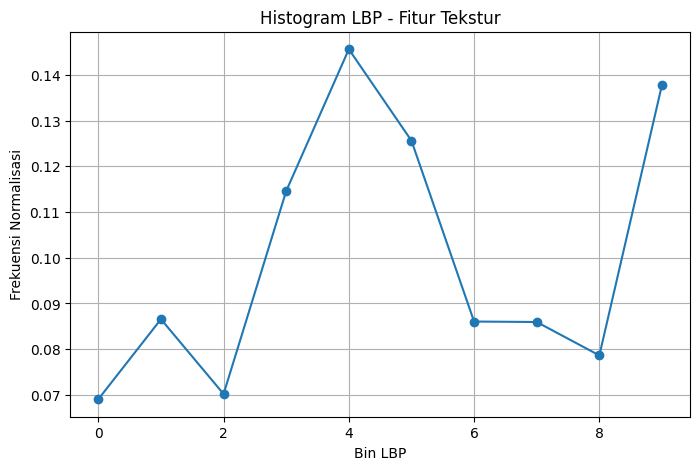

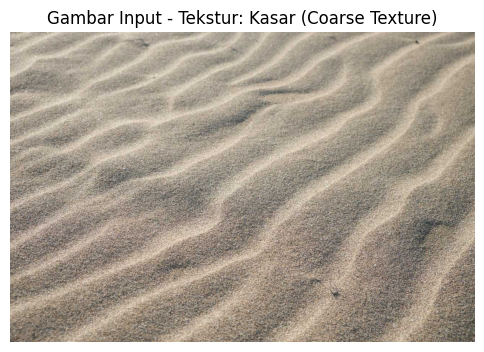

In [ ]:
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt
from math import log2

def extract_lbp_features(image_gray):
    lbp = feature.local_binary_pattern(image_gray, P=8, R=1, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, 10 + 1),
                             range=(0, 10))
    hist = hist.astype("float")
    hist /= hist.sum() + 1e-7  # normalisasi + epsilon kecil agar tidak ada pembagian 0
    return hist

def calculate_entropy(hist):
    # Entropy = -sum(p*log2(p)) untuk p!=0
    entropy = -np.sum([p * log2(p) for p in hist if p > 0])
    return entropy

def classify_texture(entropy):
    # Threshold entropi contoh:
    # Halus (fine) : entropy rendah (kurang variasi)
    # Kasar (coarse): entropy tinggi (banyak variasi/motif kompleks)
    threshold_entropy = 2.0  # threshold coba-coba, bisa disesuaikan
    if entropy < threshold_entropy:
        return "Halus (Fine Texture)"
    else:
        return "Kasar (Coarse Texture)"

def detect_and_classify_texture(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = extract_lbp_features(gray)
    entropy = calculate_entropy(hist)
    texture_type = classify_texture(entropy)
    return texture_type, hist, entropy

from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))
img = cv2.imread(filename)

texture_type, hist, entropy = detect_and_classify_texture(img)

print(f"Deteksi tekstur: {texture_type}")
print(f"Entropy histogram LBP: {entropy:.4f}")

plt.figure(figsize=(8,5))
plt.plot(hist, marker='o')
plt.title("Histogram LBP - Fitur Tekstur")
plt.xlabel("Bin LBP")
plt.ylabel("Frekuensi Normalisasi")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Gambar Input - Tekstur: {texture_type}")
plt.axis('off')
plt.show()